# 経済指標

In [29]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pylab as plt

In [19]:
df = pd.read_csv('../data/preprocessed_fx_indicators.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5894 entries, 2019-01-03 22:30:00 to 2021-04-01 06:30:00
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          5894 non-null   object 
 1   indicators       5894 non-null   object 
 2   pips_reaction    5894 non-null   float64
 3   previous_value   5894 non-null   float64
 4   predicted_value  5894 non-null   float64
 5   actual_value     5894 non-null   float64
dtypes: float64(4), object(2)
memory usage: 322.3+ KB


<AxesSubplot:>

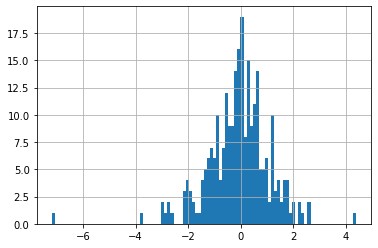

In [21]:
df.groupby(['country', 'indicators'])['pips_reaction'].mean().hist(bins=100)

In [46]:
df[['country', 'indicators']].drop_duplicates()

,country,indicators
datetime,,
2019-01-03 22:30:00,アメリカ,新規失業保険申請件数
2019-01-03 22:15:00,アメリカ,ADP雇用者数
2019-01-03 21:00:00,アメリカ,MBA住宅ローン申請指数
2019-01-03 17:30:00,香港,小売売上高
2019-01-03 17:30:00,スイス,SVME購買担当者景況指数（PMI）
...,...,...
2019-10-31 17:30:00,香港,実質ＧＤＰ(速報
2019-11-22 18:30:00,英国,非製造業PMI（速報
2019-11-22 18:30:00,英国,製造業PMI（速報


In [42]:
cond = df['country'] == 'アメリカ'
examples = df[cond][['country', 'indicators']].drop_duplicates().values

In [43]:
len(examples)

46

['アメリカ' '新規失業保険申請件数']


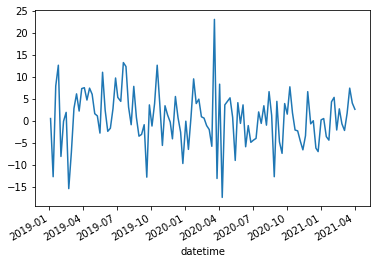

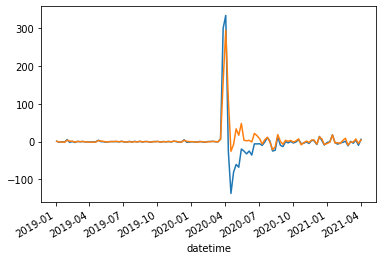

['アメリカ' 'ADP雇用者数']


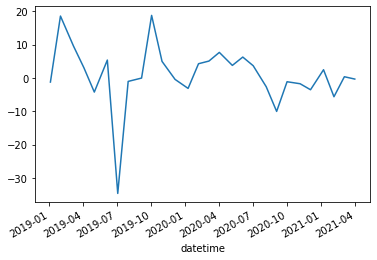

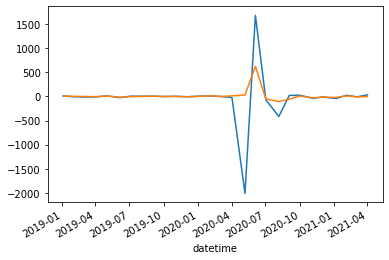

['アメリカ' 'MBA住宅ローン申請指数']


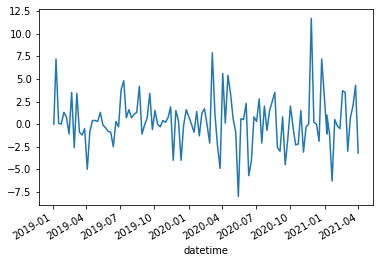

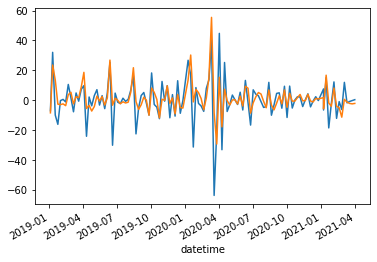

['アメリカ' '雇用統計']


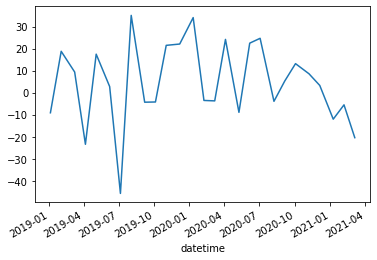

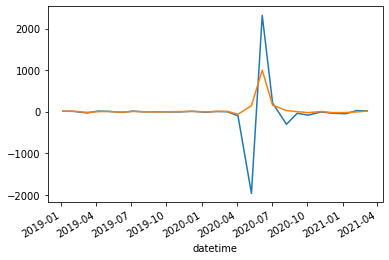

['アメリカ' 'ISM製造業景気指数']


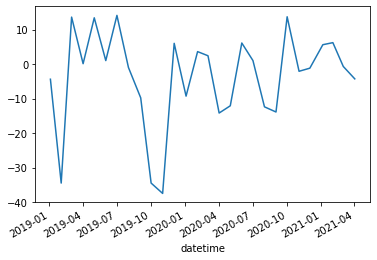

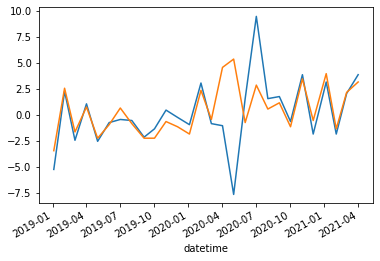

['アメリカ' '週間石油在庫統計']


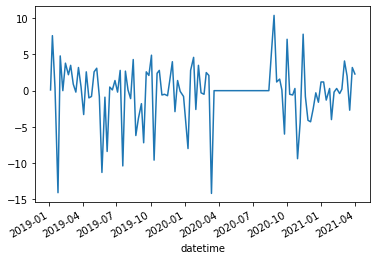

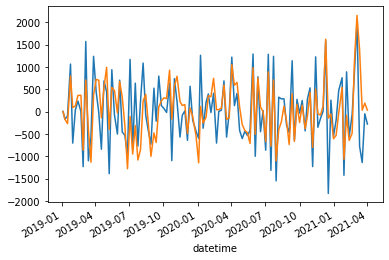

['アメリカ' 'ISM非製造業景気指数']


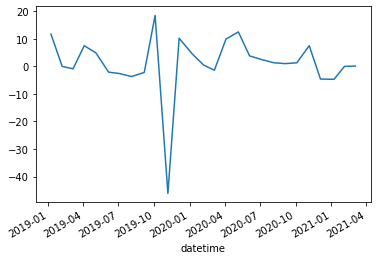

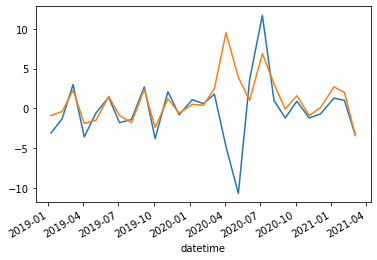

['アメリカ' 'FOMC議事録']


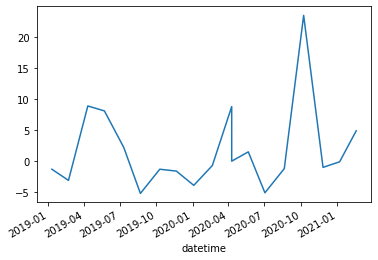

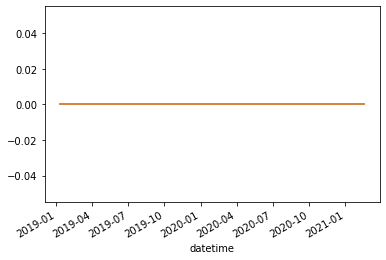

['アメリカ' '消費者物価指数']


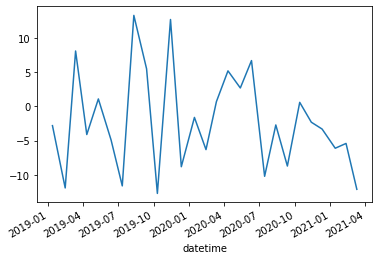

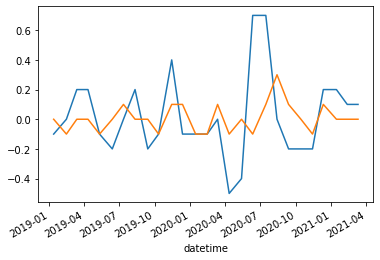

['アメリカ' '卸売在庫（速報値）']


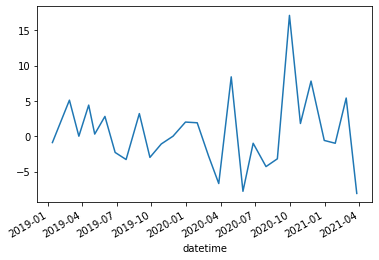

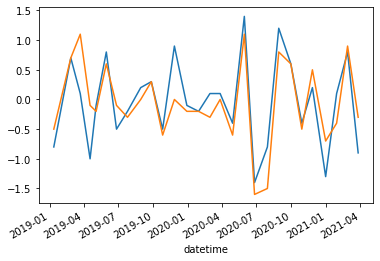

['アメリカ' 'ニューヨーク連銀製造業景気指数']


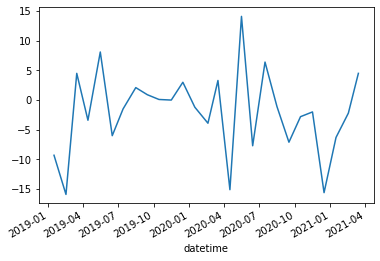

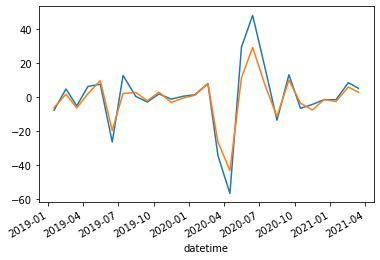

['アメリカ' '生産者物価指数']


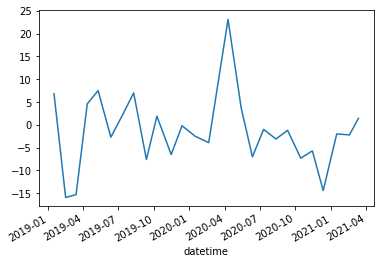

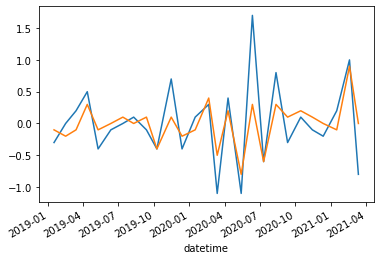

['アメリカ' '輸入物価指数']


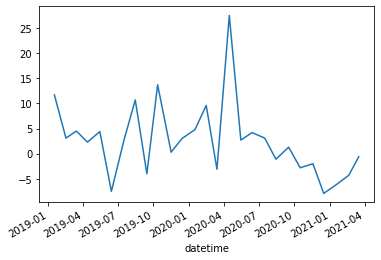

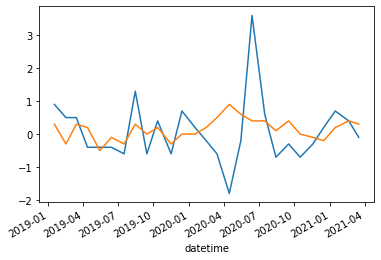

['アメリカ' 'フィラデルフィア連銀景況指数']


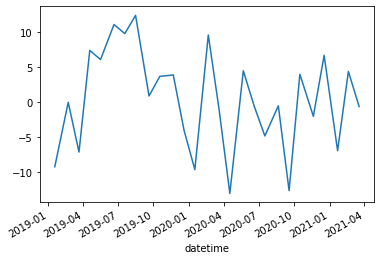

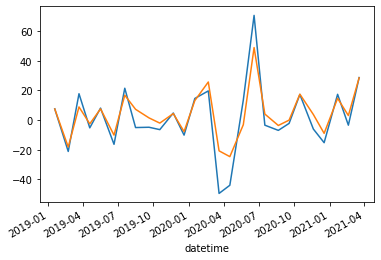

['アメリカ' '地区連銀経済報告（ベージュブック）']


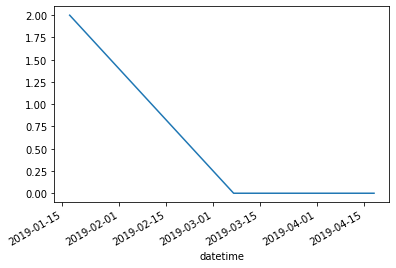

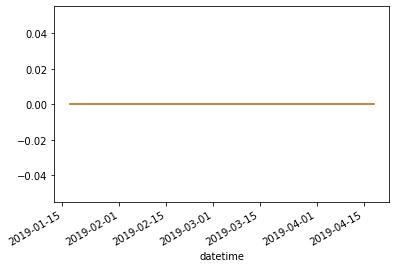

['アメリカ' '鉱工業生産指数']


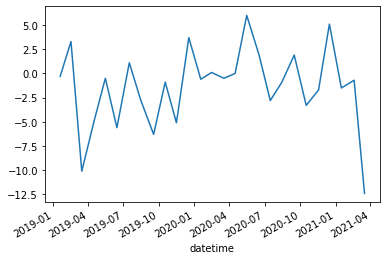

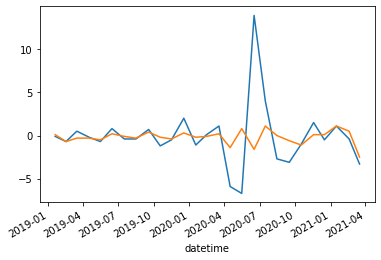

['アメリカ' 'ミシガン大学消費者信頼感指数（速報値）']


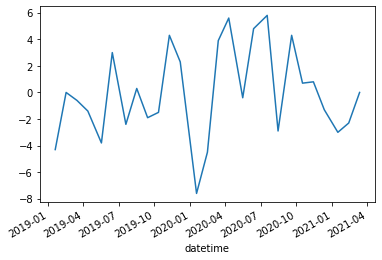

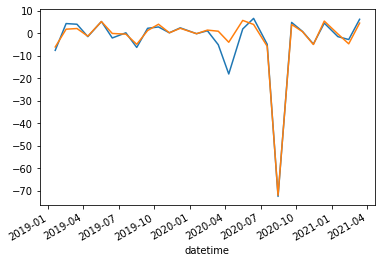

['アメリカ' '中古住宅販売件数']


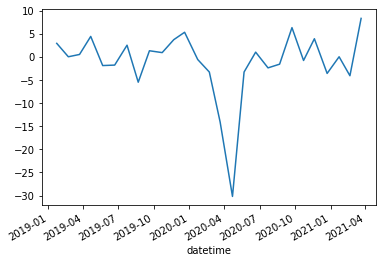

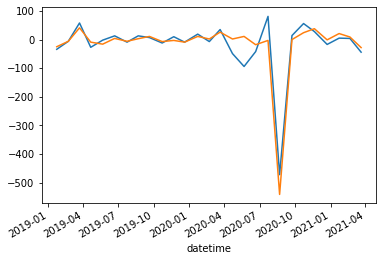

['アメリカ' '景気先行指数']


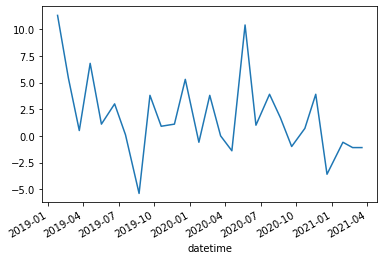

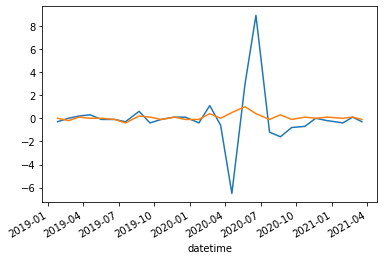

['アメリカ' 'S&Pケースシラー住宅価格（20都市）']


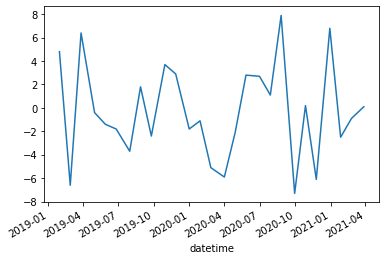

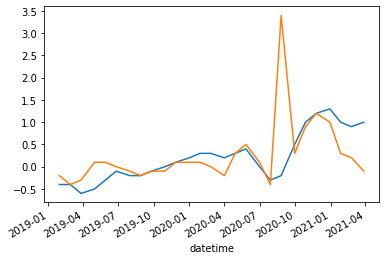

['アメリカ' 'コンファレンスボード消費者信頼感指数']


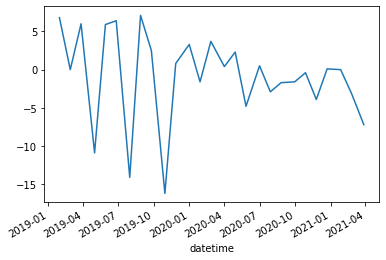

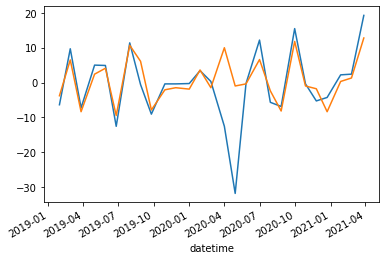

['アメリカ' 'シカゴ購買部協会景気指数（PMI）']


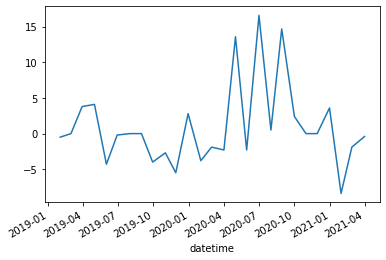

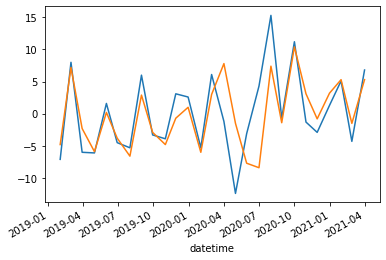

['アメリカ' '雇用コスト指数']


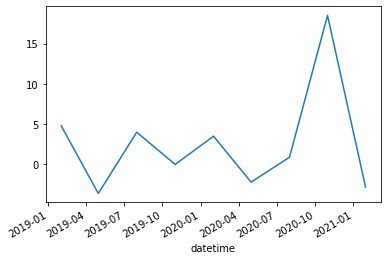

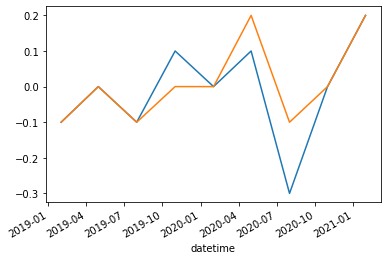

['アメリカ' 'FRB政策金利(FOMC)']


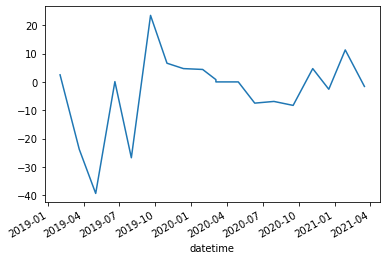

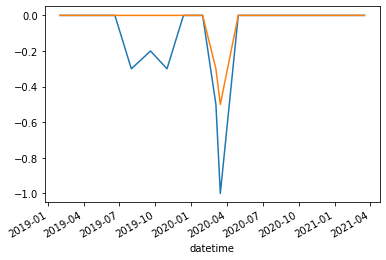

['アメリカ' '中古住宅販売成約指数']


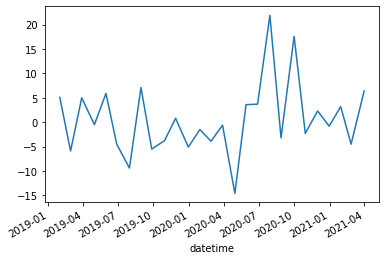

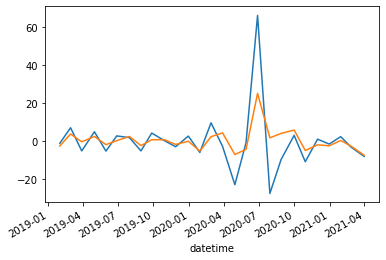

['アメリカ' '対米証券投資']


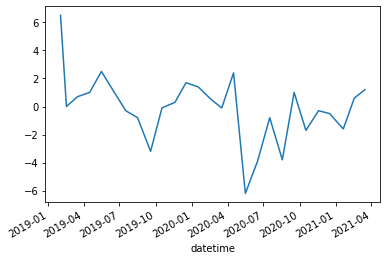

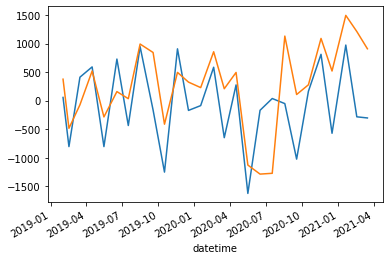

['アメリカ' '新築住宅販売件数']


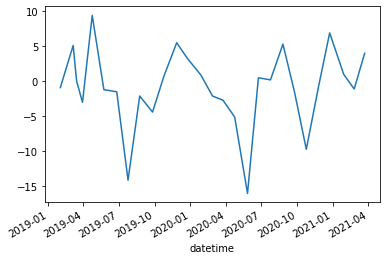

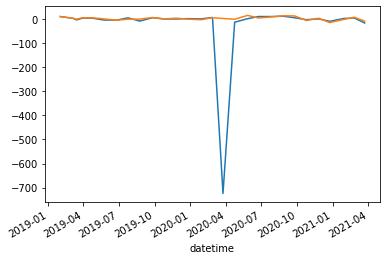

['アメリカ' '卸売在庫（確報値）']


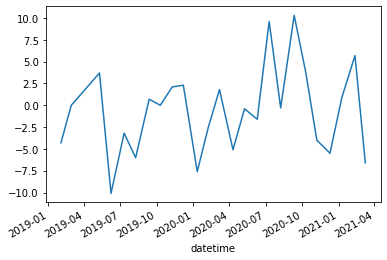

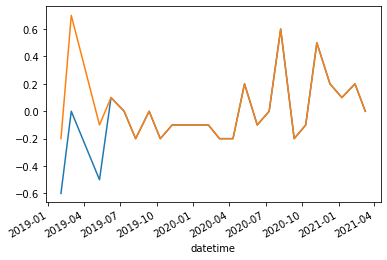

['アメリカ' 'ミシガン大学消費者信頼感指数（確報値）']


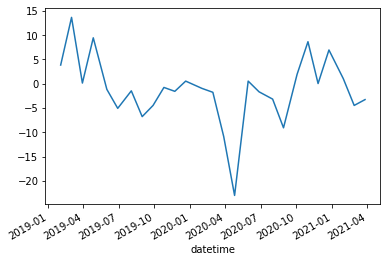

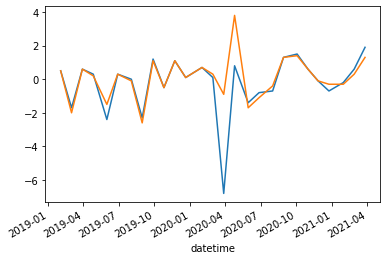

['アメリカ' '建設支出']


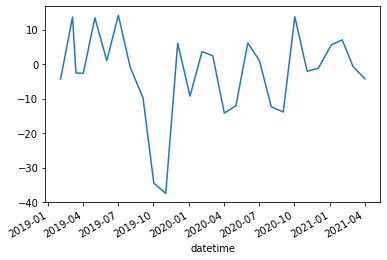

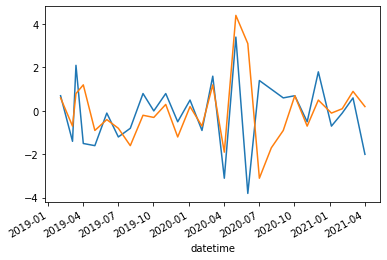

['アメリカ' '製造業新規受注']


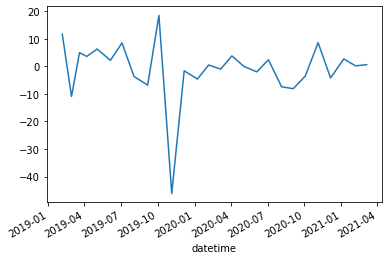

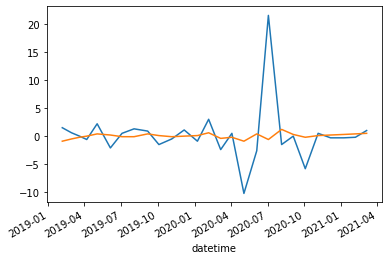

['アメリカ' '耐久財受注（確報値）']


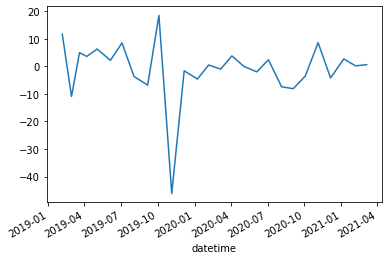

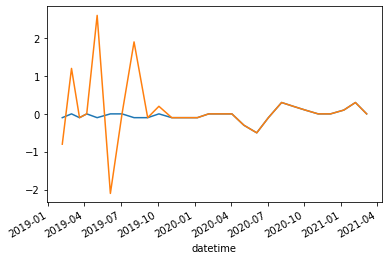

['アメリカ' '貿易収支']


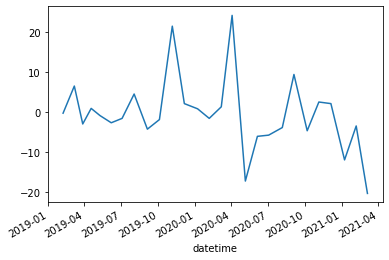

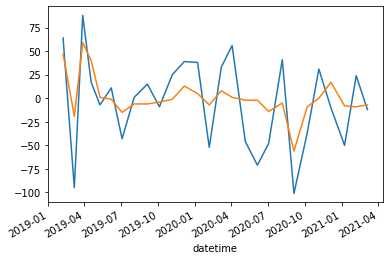

['アメリカ' '非農業部門労働生産性指数（速報値）']


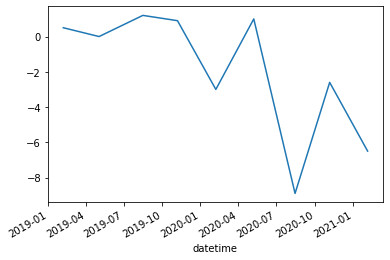

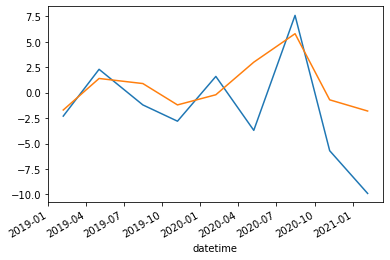

['アメリカ' '小売売上高']


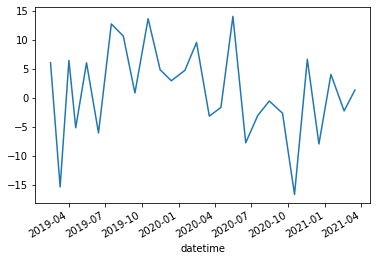

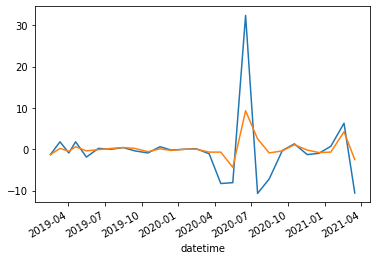

['アメリカ' '企業在庫']


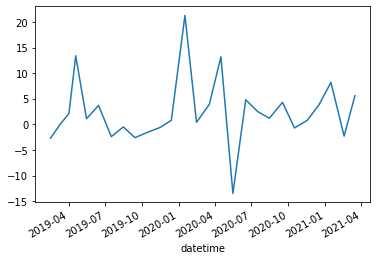

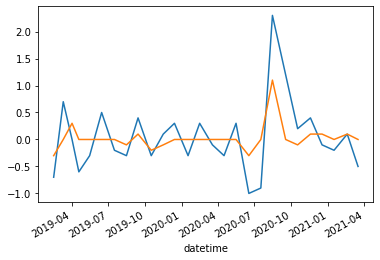

['アメリカ' '耐久財受注（速報値）']


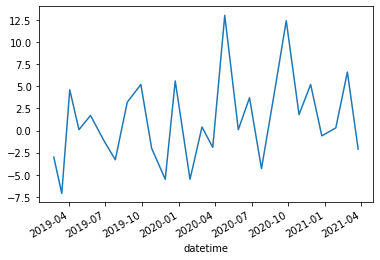

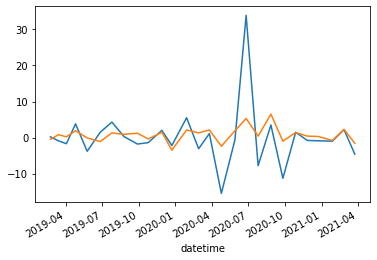

['アメリカ' '住宅価格指数']


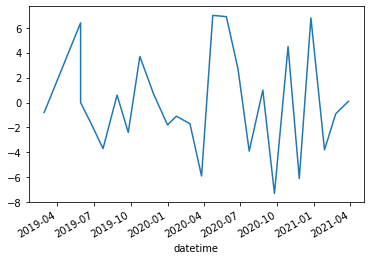

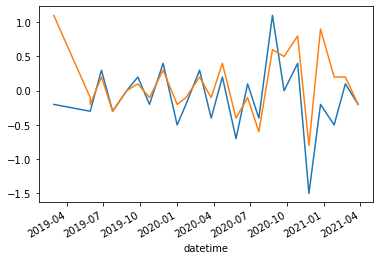

['アメリカ' '住宅着工件数']


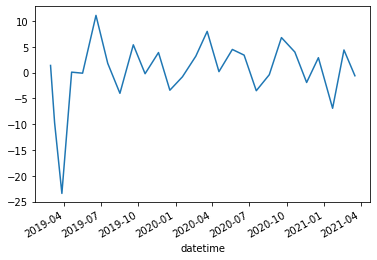

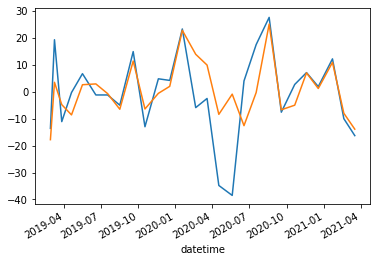

['アメリカ' '実質ＧＤＰ（速報値）']


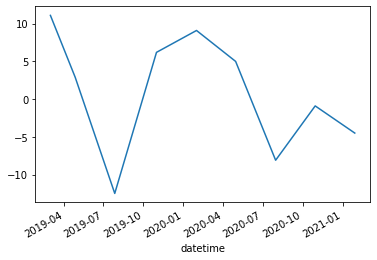

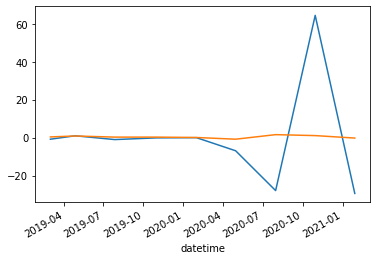

['アメリカ' '個人所得']


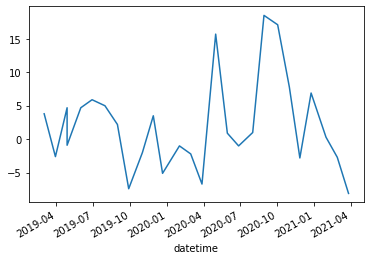

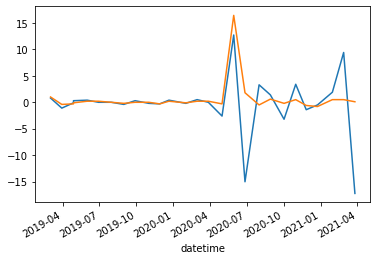

['アメリカ' 'PCEデフレータ']


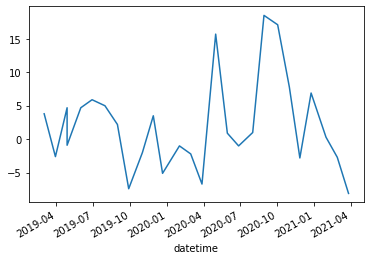

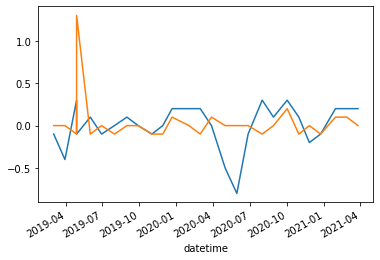

['アメリカ' '非農業部門労働生産性指数（確報値）']


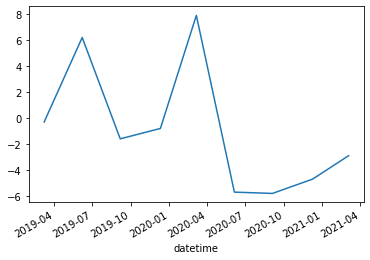

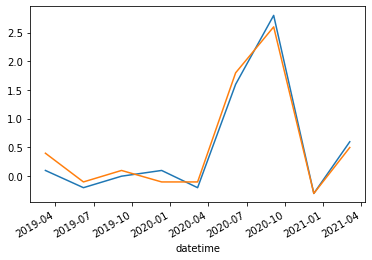

['アメリカ' '経常収支']


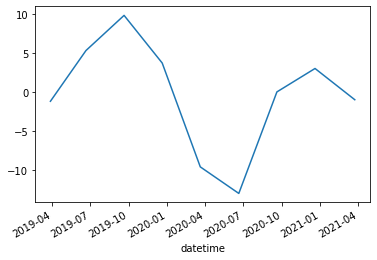

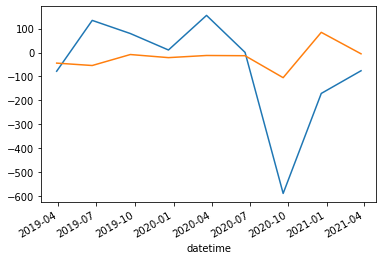

['アメリカ' '実質ＧＤＰ（確報値）']


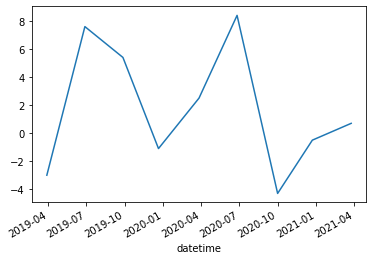

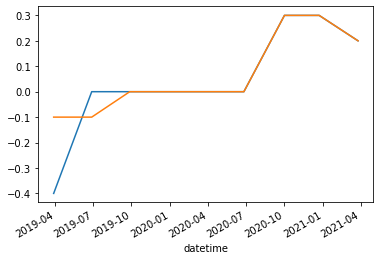

['アメリカ' '実質ＧＤＰ（改定値）']


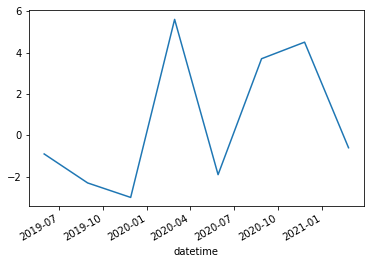

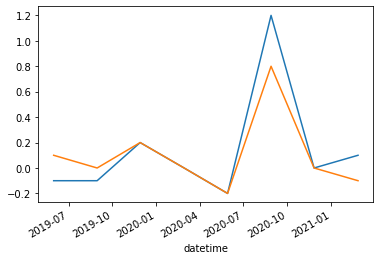

In [44]:
for e in examples:
    cond = df['country'] == e[0]
    cond &= df['indicators'] == e[1]

    print(e)
    df[cond]['pips_reaction'].plot()
    plt.show()

    (df[cond]['actual_value'] - df[cond]['previous_value']).plot()
    (df[cond]['actual_value'] - df[cond]['predicted_value']).plot()
    plt.show()